## Polynomial Regression

In [1]:
import numpy as np

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-2.09830657]), array([-2.09830657,  4.40289046]))

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.08788329]), array([[0.96914194, 0.48241085]]))

In [14]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X, y)
lin_reg1.intercept_, lin_reg.coef_

(array([3.58020652]), array([[0.96914194, 0.48241085]]))

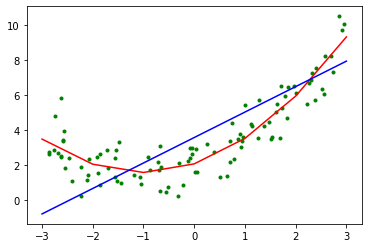

In [16]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'g.')
x_new = np.array([-3, -2, -1, 0, 1, 2, 3])
y_hat = 0.48 * x_new**2 + x_new * 0.97 + 2.08
y_hat1 = 0.48 * x_new + x_new * 0.97 + 3.58
plt.plot(x_new, y_hat, 'r-')
plt.plot(x_new, y_hat1, 'b-')

In [12]:
x_n = np.linspace(-3,3,num=30)
x_new = [[i] for i in x_n]

x_npoly = poly_features.fit_transform(x_new)

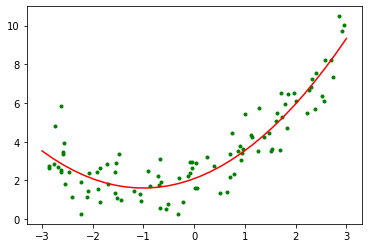

In [13]:
y_hat = lin_reg.predict(x_npoly)
plt.plot(X, y, 'g.')
plt.plot(x_new, y_hat, 'r-')
plt.show()

## Regularization

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X + 2 + np.random.randn(m, 1)

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.predict([[1.5]]) # y_hat

array([[2.85986875]])

#### Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]]) # y_hat

array([[2.8569748]])

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]]) # y_hat

array([2.82360854])

#### Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([2.80334018])

In [22]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = 'l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]]) # y_hat

array([2.82665302])

#### Elastic Net

In [25]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([2.81787396])

## PCA

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [27]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [28]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

In [29]:
X_digits.shape, y_digits.shape

((1797, 64), (1797,))

In [30]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}


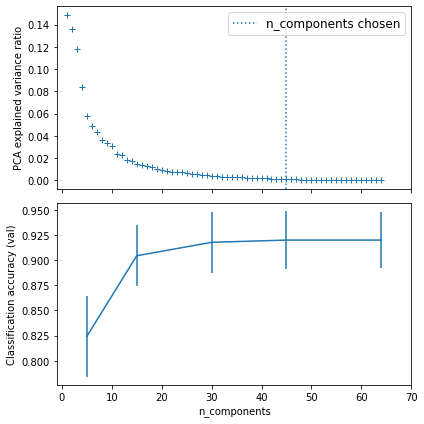

In [31]:
# Plot the PCA spectrum
pca.fit(X_digits)
 
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')
 
ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))
 
# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))
 
best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
 
plt.xlim(-1, 70)
 
plt.tight_layout()
plt.show()

In [33]:
X_digits[0,:].shape

(64,)

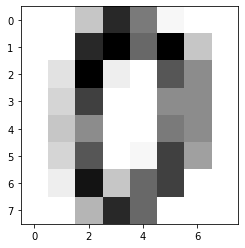

In [35]:
plt.imshow(X_digits[0,:].reshape(8,8), cmap='Greys',  interpolation='nearest')
plt.savefig('blkwht.png')
 
plt.show()